# Desafio Fictício - Aonde instalar pontos de iluminação pública para melhorar a segurança?

Apresente uma análise com visualização de dados, utilizando Python ou R e ferramentas para visualização de dados para responder à seguinte necessidade:

Considere que a Prefeitura de São Paulo disponha de orçamento para investir na instalação de 500 pontos de iluminação pública.
Quais pontos deveriam ser priorizados para melhorar a segurança pública?

Para tanto, utilize-se dos **dados de atendimento ao cidadão**
http://dados.prefeitura.sp.gov.br/dataset/dados-do-sp156, dos **dados de iluminação pública** http://dados.prefeitura.sp.gov.br/dataset/iluminacao-publica, dos **dados de segurança pública estaduais** http://catalogo.governoaberto.sp.gov.br/dataset/45-infocrim-informacoes-criminais e outros dados que julgar relevantes.

In [176]:
import pandas as pd
import numpy as np
import requests
import matplotlib as plt
import os
import matplotlib.pyplot as plt

In [177]:
def get_public_data_sp(id):
    base_url = 'http://dados.prefeitura.sp.gov.br/api/action/datastore_search?resource_id={id}'
    url = base_url.format(id=id)
    print('Getting data from ', url)
    result = requests.get(url)
    dict_result = result.json()
    return dict_result['result']['records']

In [178]:
# Dados de atendimento ao cidadão

atend_base_url = 'http://dados.prefeitura.sp.gov.br/api/action/datastore_search?resource_id={id}'
atend_data_url = {}
atend_data_url['2017-07-01'] = 'c439343b-6e2e-4cc5-84fe-aba0e54688a1'
atend_data_url['2017-01-01'] = '542c3405-5a2d-4e76-b318-92ab4869d453'
atend_data_url['2016-07-01'] = 'c3ef2030-77ec-4eed-945b-297fd52459d1'
atend_data_url['2016-01-01'] = '3a5ff4b6-d6b3-458c-a050-04af05a171ee'

In [179]:
df_atend = []

for k, v in atend_data_url.items():
    df = pd.DataFrame(get_public_data_sp(v))
    df_atend.append(df)

Getting data from  http://dados.prefeitura.sp.gov.br/api/action/datastore_search?resource_id=c439343b-6e2e-4cc5-84fe-aba0e54688a1
Getting data from  http://dados.prefeitura.sp.gov.br/api/action/datastore_search?resource_id=542c3405-5a2d-4e76-b318-92ab4869d453
Getting data from  http://dados.prefeitura.sp.gov.br/api/action/datastore_search?resource_id=c3ef2030-77ec-4eed-945b-297fd52459d1
Getting data from  http://dados.prefeitura.sp.gov.br/api/action/datastore_search?resource_id=3a5ff4b6-d6b3-458c-a050-04af05a171ee


In [180]:
df_atends = pd.concat(df_atend)
df_atends.head()

,Assunto,Canal Atendimento,Data Abertura,Data Parecer,Distrito,Hora Abertura,Hora Parecer,Prefeitura Regional,Servico,Status Solicitaзгo,Status Solicitaусo,Status Solicitaчуo,Status Solicitaחדo,Tema,_id,Мrgсo,Уrgгo,гrgуo,׃rgדo
0,Remoзгo de grandes objetos,CENTRAL TELEFФNICA,2017-07-07T00:00:00,None,SACOMA,2017-11-01T12:48:00,None,IPIRANGA,Remoзгo de grandes objetos em vias pъblicas,AGUARDANDO ATENDIMENTO,NaN,NaN,NaN,Lixo e limpeza,1,NaN,AMLURB,NaN,NaN
1,Linhas e itinerбrios de фnibus,CENTRAL TELEFФNICA,2017-07-07T00:00:00,2017-07-17T00:00:00,JARDIM ANGELA,2017-11-01T12:48:00,2017-11-01T18:50:00,M'BOI MIRIM,Reclamaзгo de intervalo excessivo da linha,FINALIZADA,NaN,NaN,NaN,Transporte,2,NaN,SPTRANS,NaN,NaN
2,Buraco e pavimentaзгo,PORTAL ONLINE,2017-07-07T00:00:00,2017-09-23T00:00:00,CANGAIBA,2017-11-01T12:48:00,2017-11-01T17:36:00,PENHA,Tapa-buraco,FINALIZADA,NaN,NaN,NaN,Rua e bairro,3,NaN,SMPR,NaN,NaN
3,Criaзгo inadequada de animais,CENTRAL TELEFФNICA,2017-07-07T00:00:00,2017-07-13T00:00:00,VILA PRUDENTE,2017-11-01T12:50:00,2017-11-01T18:45:00,VILA PRUDENTE,Denъncia de condiзхes inadequadas de criaзгo,FINALIZADA,NaN,NaN,NaN,Animais,4,NaN,COVISA-SUVIS,NaN,NaN
4,Drenagem de бgua de chuva,CENTRAL TELEFФNICA,2017-07-07T00:00:00,None,BRASILANDIA,2017-11-01T12:48:00,None,FREGUESIA-BRASILANDIA,"Limpeza de valas, valetas e sarjetхes",AGUARDANDO ATENDIMENTO,NaN,NaN,NaN,Rua e bairro,5,NaN,SMPR,NaN,NaN


In [181]:
# Dados estão com encoding="latin-1"

In [182]:
# Dados de localização dos postes

lampposts_location_id = '441a59c4-44d7-4428-8918-0560fdf145c8'
df_lampposts_loc = pd.DataFrame(get_public_data_sp(lampposts_location_id))
df_lampposts_loc.head()

Getting data from  http://dados.prefeitura.sp.gov.br/api/action/datastore_search?resource_id=441a59c4-44d7-4428-8918-0560fdf145c8


,ID,LAT,LOCAL,LONG,_id
0,1313,-23.5058,parelheiros,-46.4145,1
1,5299,-23.4918,parelheiros,-46.458,2
2,10601,-23.4321,cidade_ademar,-46.3826,3
3,11213,-23.5058,parelheiros,-46.4146,4
4,11820,-23.4128,MBoiMirim,-46.4721,5


In [183]:
# Locais no dataset de atendimentos
df_atends['Prefeitura Regional'].value_counts()

SE                           38
                             31
MOOCA                        23
LAPA                         23
SANTO AMARO                  18
M'BOI MIRIM                  17
PENHA                        17
ITAQUERA                     16
SAO MIGUEL                   15
IPIRANGA                     15
VILA MARIA-VILA GUILHERME    14
BUTANTA                      14
PINHEIROS                    13
CAPELA DO SOCORRO            13
CASA VERDE-CACHOEIRINHA      13
FREGUESIA-BRASILANDIA        12
VILA PRUDENTE                11
CIDADE ADEMAR                11
JABAQUARA                    11
SANTANA-TUCURUVI             10
SAO MATEUS                    9
ARICANDUVA-FORMOSA-CARRAO     8
JACANA-TREMEMBE               8
VILA MARIANA                  8
CAMPO LIMPO                   7
PIRITUBA-JARAGUA              6
SAPOPEMBA                     6
ERMELINO MATARAZZO            3
ITAIM PAULISTA                3
GUAIANASES                    3
PARELHEIROS                   3
CIDADE T

In [295]:
# Locais no dataset de postes
df_lampposts_loc['LOCAL'].value_counts()

parelheiros           16
MBoiMirim             14
Butanta               13
campo_limpo           11
penha                 10
SaoMateus              8
pinheiros              8
Pontos Novos           5
Ermelino_Matarazzo     3
vila_mariana           3
jabaquara              3
capela_socorro         3
ItaimPaulista          1
cidade_ademar          1
pitituba               1
Name: LOCAL, dtype: int64

## Problem on keys

There is no key that can merge the two datasets, so it is a huge risk to take to relate two datasets

In [185]:
# https://developers.google.com/maps/documentation/geocoding/intro
geocode_endpoint = 'https://maps.googleapis.com/maps/api/geocode/json?'

## Trabalhando com dados de BO

In [186]:
# Dados de BO Roubo de Celular
filename = '../data/DadosBO_2017_1(FURTO DE CELULAR).csv'
df_BOs = pd.read_csv(filename, sep=';', encoding='utf-8')
df_BOs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20189 entries, 0 to 20188
Data columns (total 52 columns):
ANO_BO                      20189 non-null int64
NUM_BO                      20189 non-null int64
NUMERO_BOLETIM              20189 non-null object
BO_INICIADO                 20189 non-null object
BO_EMITIDO                  20189 non-null object
DATAOCORRENCIA              20189 non-null object
PERIDOOCORRENCIA            20189 non-null object
DATACOMUNICACAO             20189 non-null object
DATAELABORACAO              20189 non-null object
BO_AUTORIA                  20189 non-null object
FLAGRANTE                   20189 non-null object
NUMERO_BOLETIM_PRINCIPAL    845 non-null object
LOGRADOURO                  16996 non-null object
NUMERO                      20175 non-null float64
BAIRRO                      13889 non-null object
CIDADE                      16996 non-null object
UF                          16996 non-null object
LATITUDE                    16989 non-null o

In [187]:
# columns = ['ANO_BO', 'DATAOCORRENCIA','PERIDOOCORRENCIA','FLAGRANTE',
#            'LOGRADOURO','NUMERO','BAIRRO','CIDADE',
#            'UF','LATITUDE','LONGITUDE','DESCRICAOLOCAL',
#            'EXAME','SOLUCAO','VITIMAFATAL']
columns = ['ANO_BO', 'DATAOCORRENCIA','PERIDOOCORRENCIA','FLAGRANTE',
           'CIDADE','UF','LATITUDE','LONGITUDE','DESCRICAOLOCAL',
           'EXAME','SOLUCAO','VITIMAFATAL']

df_data = df_BOs[columns]
df_data['DATA'] = pd.to_datetime(df_data['DATAOCORRENCIA'], format='%d/%m/%Y')
df_data.head()

/home/rodrigo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,ANO_BO,DATAOCORRENCIA,PERIDOOCORRENCIA,FLAGRANTE,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,VITIMAFATAL,DATA
0,2017,31/12/2016,A NOITE,Não,CAMPINAS,SP,"-22,828425152","-47,03351226",Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,NaN,2016-12-31
1,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,NaN,2016-12-31
2,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,NaN,2016-12-31
3,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,NaN,2016-12-31
4,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,NaN,2016-12-31


In [188]:
df_data.isnull().sum()

ANO_BO                  0
DATAOCORRENCIA          0
PERIDOOCORRENCIA        0
FLAGRANTE               0
CIDADE               3193
UF                   3193
LATITUDE             3200
LONGITUDE            3200
DESCRICAOLOCAL          0
EXAME               17851
SOLUCAO                 0
VITIMAFATAL         20147
DATA                    0
dtype: int64

In [189]:
df_data.PERIDOOCORRENCIA.value_counts()

A NOITE            6219
A TARDE            5380
PELA MANHÃ         4547
DE MADRUGADA       3166
EM HORA INCERTA     877
Name: PERIDOOCORRENCIA, dtype: int64

In [199]:
dict_tipo_periodo = {
    'EM HORA INCERTA':0,
    'PELA MANHÃ':1,
    'A TARDE':2,
    'A NOITE':3,
    'DE MADRUGADA':4
}

tipo_periodo = lambda x: dict_tipo_periodo[x] 
df_data['PERIDOOCORRENCIA_TIPO'] = df_data['PERIDOOCORRENCIA'].apply(tipo_periodo)
df_data.head()

/home/rodrigo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,ANO_BO,DATAOCORRENCIA,PERIDOOCORRENCIA,FLAGRANTE,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,VITIMAFATAL,DATA,PERIDOOCORRENCIA_TIPO,FLAGRANTE_BOOL,VITIMAFATAL_BOOL
0,2017,31/12/2016,A NOITE,Não,CAMPINAS,SP,"-22,828425152","-47,03351226",Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,Não,2016-12-31,3,False,False
1,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,Não,2016-12-31,3,False,False
2,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,Não,2016-12-31,3,False,False
3,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,Não,2016-12-31,3,False,False
4,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,Não,2016-12-31,3,False,False


In [200]:
df_data.FLAGRANTE.value_counts()

Não    19430
Sim      759
Name: FLAGRANTE, dtype: int64

In [192]:
dict_bool_yes_no = {
    'Não':False,
    'Sim':True
}
yes_or_no_to_bool = lambda x:dict_bool_yes_no[x]
df_data['FLAGRANTE_BOOL'] = df_data.FLAGRANTE.apply(yes_or_no_to_bool)
df_data.head()

/home/rodrigo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ANO_BO,DATAOCORRENCIA,PERIDOOCORRENCIA,FLAGRANTE,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,VITIMAFATAL,DATA,PERIDOOCORRENCIA_TIPO,FLAGRANTE_BOOL
0,2017,31/12/2016,A NOITE,Não,CAMPINAS,SP,"-22,828425152","-47,03351226",Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,NaN,2016-12-31,2,False
1,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,NaN,2016-12-31,2,False
2,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,NaN,2016-12-31,2,False
3,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,NaN,2016-12-31,2,False
4,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,NaN,2016-12-31,2,False


In [193]:
df_data.SOLUCAO.value_counts()

BO PARA REGISTRO                  5929
ENCAMINHAMENTO DP ÁREA DO FATO    4532
BO PARA INVESTIGAÇÃO              4276
APRECIAÇÃO DO DELEGADO TITULAR    3672
BO PARA ADENDO                     808
BO PARA FLAGRANTE                  718
ENCAM FEBEM/V.INFAN.JUVENTUDE      164
BO PARA INQUÉRITO                   55
AGUARDANDO LAUDOS                   17
AG. REPRESENTAÇÃO/REQUERIMENTO      16
OFÍCIO                               2
Name: SOLUCAO, dtype: int64

In [194]:
df_data.DESCRICAOLOCAL.value_counts()

Via pública                   8165
Outros                        5756
Residência                    2897
Comércio e serviços           1296
Lazer e recreação              459
Terminal/Estação               261
Rodovia/Estrada                229
Unidade rural                  193
Restaurante e afins            182
Saúde                          117
Shopping Center                 88
Centro Comerc./Empresarial      70
Area não ocupada                65
Estabelecimento de ensino       59
Estabelecimento bancário        54
Repartição Pública              46
Estabelecimento industrial      42
Hospedagem                      39
Condominio Comercial            37
Escritório                      33
Condominio Residencial          32
Templo e afins                  25
Serviços e bens públicos        23
Entidade assistencial           17
Estrada de ferro                 3
Sindicato                        1
Name: DESCRICAOLOCAL, dtype: int64

In [195]:
df_data.EXAME.value_counts()

IC        1419
IC-IML     615
IML        304
Name: EXAME, dtype: int64

In [196]:
df_data.VITIMAFATAL.value_counts()

Sim    42
Name: VITIMAFATAL, dtype: int64

In [197]:
df_data.VITIMAFATAL.fillna('Não',inplace=True)
df_data['VITIMAFATAL_BOOL'] = df_data.VITIMAFATAL.apply(yes_or_no_to_bool)
df_data.head()

/home/rodrigo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/rodrigo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ANO_BO,DATAOCORRENCIA,PERIDOOCORRENCIA,FLAGRANTE,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,VITIMAFATAL,DATA,PERIDOOCORRENCIA_TIPO,FLAGRANTE_BOOL,VITIMAFATAL_BOOL
0,2017,31/12/2016,A NOITE,Não,CAMPINAS,SP,"-22,828425152","-47,03351226",Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,Não,2016-12-31,2,False,False
1,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,Não,2016-12-31,2,False,False
2,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,Não,2016-12-31,2,False,False
3,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,Não,2016-12-31,2,False,False
4,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,Não,2016-12-31,2,False,False


3    6219
2    5380
1    4547
4    3166
0     877
Name: PERIDOOCORRENCIA_TIPO, dtype: int64


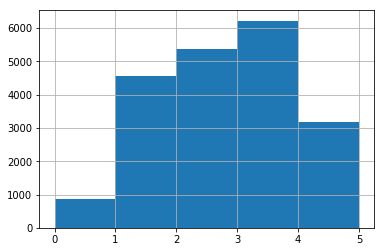

In [206]:
print(df_data.PERIDOOCORRENCIA_TIPO.value_counts())
df_data.PERIDOOCORRENCIA_TIPO.hist(bins=[0,1,2,3,4,5])

In [241]:
com_luz = ((df_data.PERIDOOCORRENCIA_TIPO==1) | (df_data.PERIDOOCORRENCIA_TIPO==2)) 
sem_luz = ((df_data.PERIDOOCORRENCIA_TIPO==3) | (df_data.PERIDOOCORRENCIA_TIPO==4))
print('Com Luz Solar: ', com_luz.sum())
print('Sem Luz Solar: ', sem_luz.sum())

Com Luz Solar:  9927
Sem Luz Solar:  9385


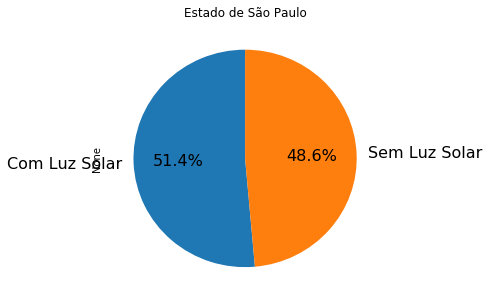

In [242]:
luz_solar = [com_luz.sum(),sem_luz.sum()]
pd.Series(luz_solar).plot(
    kind='pie',
    labels=['Com Luz Solar','Sem Luz Solar'],
    title='Estado de São Paulo',
    startangle=90,
    shadow=False,
    figsize=(5,5),
    fontsize=16,
    autopct='%1.1f%%')

In [235]:
com_luz_flagrante = ((com_luz) & (df_data.FLAGRANTE_BOOL==True))
sem_luz_flagrante = ((sem_luz) & (df_data.FLAGRANTE_BOOL==True))
print('Com Luz Solar Flagrante: ', com_luz_flagrante.sum()/com_luz.sum())
print('Sem Luz Solar Flagrante: ', sem_luz_flagrante.sum()/sem_luz.sum())

Com Luz Solar Flagrante:  0.02703332556513633
Sem Luz Solar Flagrante:  0.05074773228732533


In [236]:
df_sp = df_data[df_data.CIDADE=='S.PAULO']

In [239]:
com_luz_sp = ((df_sp.PERIDOOCORRENCIA_TIPO==1) | (df_sp.PERIDOOCORRENCIA_TIPO==2)) 
sem_luz_sp = ((df_sp.PERIDOOCORRENCIA_TIPO==3) | (df_sp.PERIDOOCORRENCIA_TIPO==4))
print('Com Luz Solar: ', com_luz_sp.sum())
print('Sem Luz Solar: ', sem_luz_sp.sum())

Com Luz Solar:  4291
Sem Luz Solar:  4079


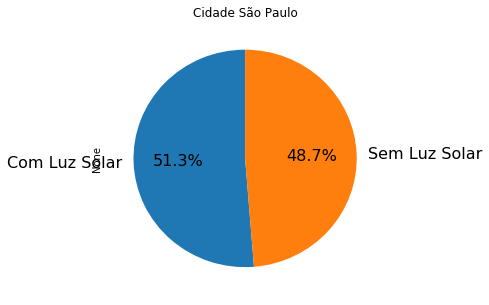

In [240]:
luz_solar_sp = [com_luz_sp.sum(),sem_luz_sp.sum()]
pd.Series(luz_solar_sp).plot(
    kind='pie',
    labels=['Com Luz Solar','Sem Luz Solar'],
    title='Cidade São Paulo',
    startangle=90,
    shadow=False,
    figsize=(5,5),
    fontsize=16,
    autopct='%1.1f%%')

In [275]:
df_data['COM_LUZ_SOLAR'] = (((df_data.PERIDOOCORRENCIA_TIPO==1) | (df_data.PERIDOOCORRENCIA_TIPO==2)))
df_data['SEM_LUZ_SOLAR'] = (((df_data.PERIDOOCORRENCIA_TIPO==3) | (df_data.PERIDOOCORRENCIA_TIPO==4)))

/home/rodrigo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/rodrigo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [276]:
df_data.head()

,ANO_BO,DATAOCORRENCIA,PERIDOOCORRENCIA,FLAGRANTE,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,VITIMAFATAL,DATA,PERIDOOCORRENCIA_TIPO,FLAGRANTE_BOOL,VITIMAFATAL_BOOL,COM_LUZ_SOLAR,SEM_LUZ_SOLAR
0,2017,31/12/2016,A NOITE,Não,CAMPINAS,SP,"-22,828425152","-47,03351226",Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,Não,2016-12-31,3,False,False,False,True
1,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,Não,2016-12-31,3,False,False,False,True
2,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,Não,2016-12-31,3,False,False,False,True
3,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,Não,2016-12-31,3,False,False,False,True
4,2017,31/12/2016,A NOITE,Não,S.PAULO,SP,"-23,6263106231","-46,6377738228",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,Não,2016-12-31,3,False,False,False,True


In [286]:
df = df_data.groupby('DATA')['COM_LUZ_SOLAR','SEM_LUZ_SOLAR'].sum()
df.head()
df.reset_index()

,DATA,COM_LUZ_SOLAR,SEM_LUZ_SOLAR
0,1983-12-31,0.0,1.0
1,1987-01-25,1.0,0.0
2,1990-01-28,0.0,1.0
3,1997-01-18,1.0,0.0
4,1997-01-28,0.0,1.0
5,1998-11-04,1.0,0.0
6,2001-01-17,0.0,1.0
7,2007-01-03,0.0,1.0
8,2014-01-09,0.0,1.0
9,2014-01-10,1.0,0.0


In [291]:
df.max()

COM_LUZ_SOLAR    428.0
SEM_LUZ_SOLAR    516.0
dtype: float64

/home/rodrigo/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


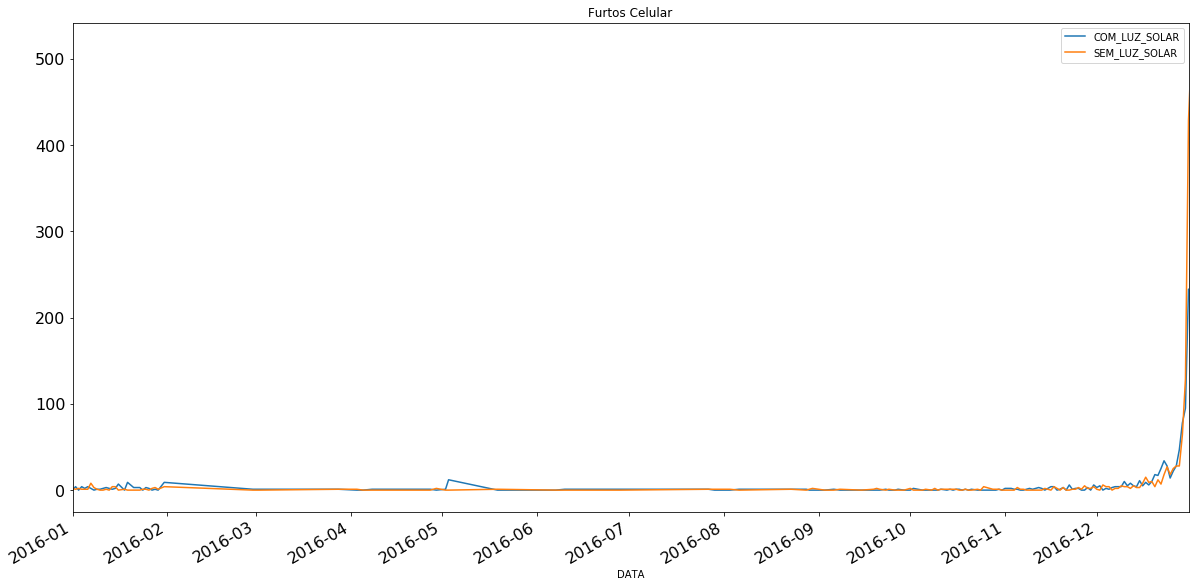

In [284]:
df.plot(
    y=['COM_LUZ_SOLAR','SEM_LUZ_SOLAR'],
    title='Furtos Celular',
    kind='line',
    figsize=(20,10),
    xlim=[
        pd.Timestamp('2016-01-01'),
        pd.Timestamp('2016-12-31')
    ],
    fontsize=16)

/home/rodrigo/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


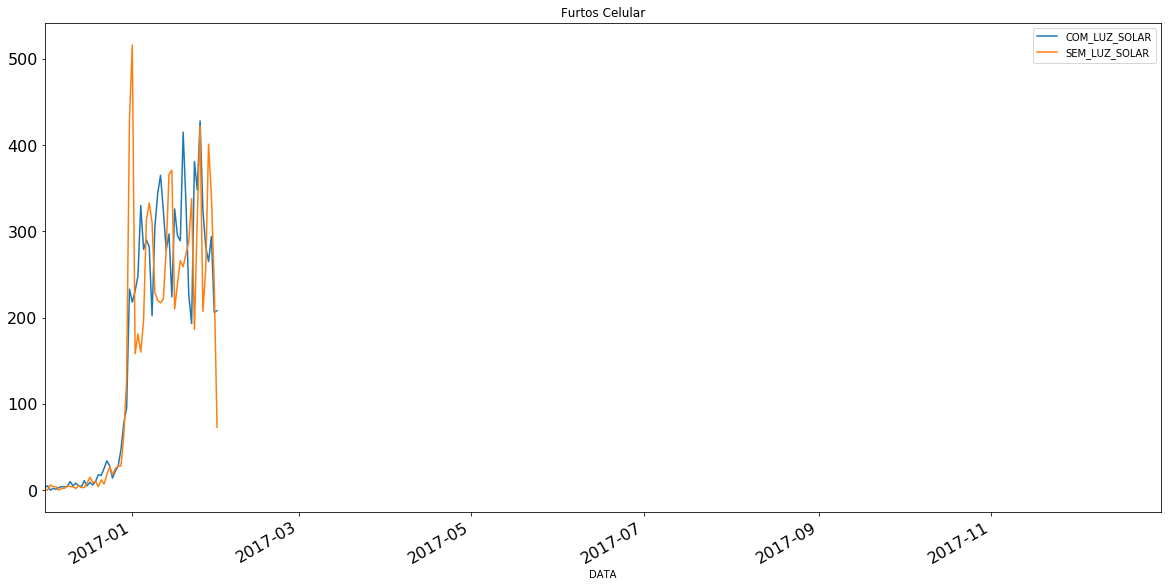

In [296]:
df.plot(
    y=['COM_LUZ_SOLAR','SEM_LUZ_SOLAR'],
    title='Furtos Celular',
    kind='line',
    figsize=(20,10),
    xlim=[
        pd.Timestamp('2016-12-01'),
        pd.Timestamp('2017-12-31')
    ],
    fontsize=16)

In [297]:
# O dataset possui um comportamento muito inesperado, vamos verificar o dataset do ano de 2018